# Creating Beautiful Population Density Maps with Python
## Mapping where the worlds 7.8 billion humans live with Python
### [Source Article](https://towardsdatascience.com/creating-beautiful-population-density-maps-with-python-fcdd84035e06)

### Data Preparation

There are a lot of population density datasets out there however for the purpose of this exercise we will use the [GHSL](https://ghsl.jrc.ec.europa.eu/download.php?ds=pop) — Global Human Settlement Layer. The data is freely available and terms of service can be found [here](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fghsl.jrc.ec.europa.eu%2Fdocuments%2FGHSL_Data_Package_2019.pdf%3Ft%3D1478q532234372&clen=4264054&chunk=true).
The first thing to do is to download the data to wherever you like to do your data visualisations. The data is available [here](https://ghsl.jrc.ec.europa.eu/download.php?ds=pop) and the specific file needed is the GHS population, 30 arcsec dataset from 2018. It is important to note that this tutorial will require the WGS84 projection. The data comes in the form of a tif file and can be read with rasterio.

In [25]:
import rasterio
import numpy as np

In [26]:
file_list = ['GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_28_8.tif', 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_29_8.tif']

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [28]:
tif_file = rasterio.open('stack.tif')
ghs_data = tif_file.read()

In [29]:
import numpy as np

print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=9959000.0, bottom=0.0, right=10959000.0, top=1000000.0)
Tiff CRS ESRI:54009
Data shape (2, 4000, 4000)
Max value 12146.263
Min value -200.0


In [30]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [31]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

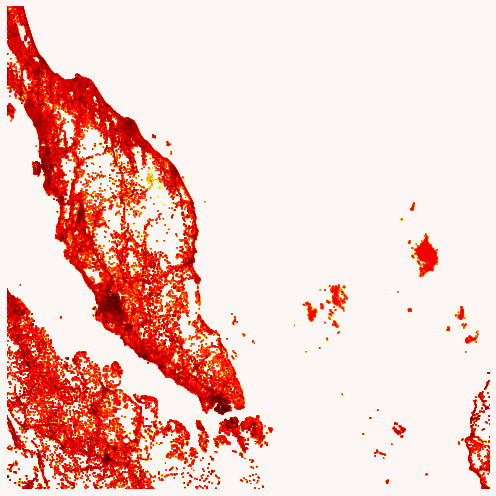

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')

plt.tight_layout()
plt.savefig('hot-population-density.png', dpi=300)

In [34]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

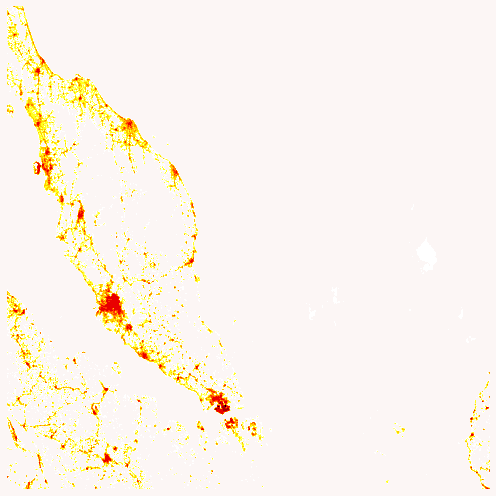

In [35]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')

plt.tight_layout()
plt.savefig('population-density.png', dpi=300)